In [1]:
import cv2
import numpy as np

from ultralytics import YOLO
from sort_master.sort import Sort

import matplotlib.pyplot as plt
%matplotlib inline

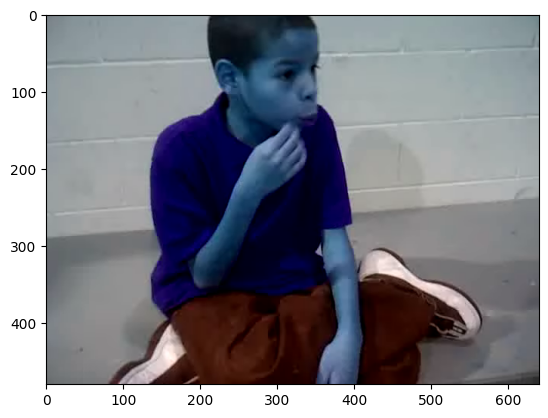

In [2]:
vid = cv2.VideoCapture("./SSBD/videos/v_ArmFlapping_01.avi")
ret, frame = vid.read()

plt.imshow(frame)

In [3]:
model = YOLO("yolov8n.pt")

results = model(frame)
results


0: 480x640 1 person, 85.2ms
Speed: 33.5ms preprocess, 85.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [4]:
detection_threshold = 0.8
tracker = Sort()

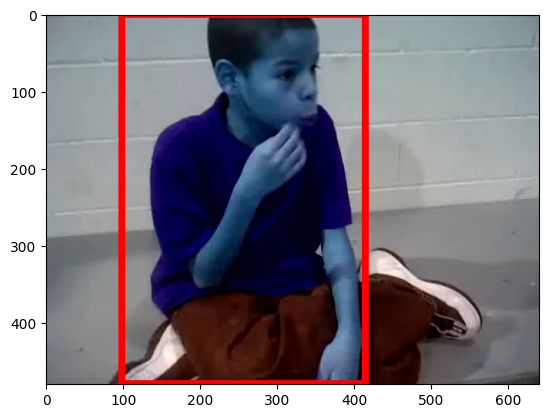

In [5]:
outp = frame.copy()
for result in results:
    detections = []
    for r in result.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = r
        x1 = int(x1)
        x2 = int(x2)
        y1 = int(y1)
        y2 = int(y2)
        class_id = int(class_id)
        if score > detection_threshold:
            detections.append([x1, y1, x2, y2, score , class_id])
    detections = np.array(detections)
    track_bbs_ids = tracker.update(detections)


    for track in track_bbs_ids:
        # bbox = track.bbox
        # x1, y1, x2, y2 = bbox
        # track_id = track.track_id
        x1, y1, x2, y2, id = list(map(int , track.tolist()))
        name = f"ID : {id}"
        color = (255,0,0)
        cv2.rectangle(outp, (int(x1), int(y1)), (int(x2), int(y2)), color , 7)
        cv2.putText(outp , name , (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 2 , color , 7)
        # print(track)
plt.imshow(outp)

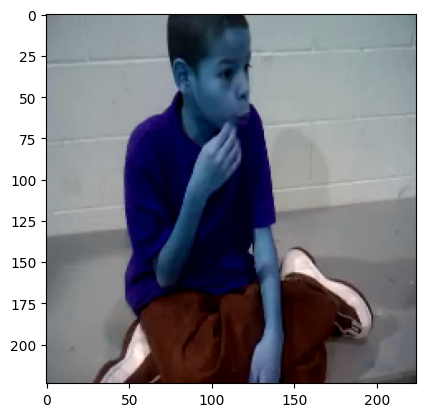

In [21]:
ext = 1.5 #extend video by 1.5x

midx = (x2-x1)//2
midy = (y2-y1)//2

extx = int((x2-x1) * ext)
exty = int((y2-y1) * ext)

cropx1 = max(midx - extx//2 , 0)
cropx2 = max(midx + extx//2 , frame.shape[1])
cropy1 = max(midy - exty//2 , 0)
cropy2 = max(midy + exty//2 , frame.shape[0])

x = frame[cropy1:cropy2 , cropx1:cropx2]
x = cv2.resize(x , (224,224))
plt.imshow(x)

# frame.shape